In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# %matplotlib inline

In [4]:
df = pd.read_csv("../pokemon.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [20]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [5]:
#splitting the df into type 1 and type 2 to plot happiness levels for these types
type1_df = df[["name","type1","base_happiness"]]
type2_df = df[["name", "type2", "base_happiness"]]

In [6]:
#finding out how many types there are total
types1 = pd.unique(type1_df["type1"])
types2 = pd.unique(type2_df["type2"])

In [7]:
len(types1)
len(types2)

19

/var/folders/7q/068rywhd1dnbgy6_flx828c00000gn/T/ipykernel_3522/3974073925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_df["base_happiness"] = happy_df["base_happiness"].astype(int)


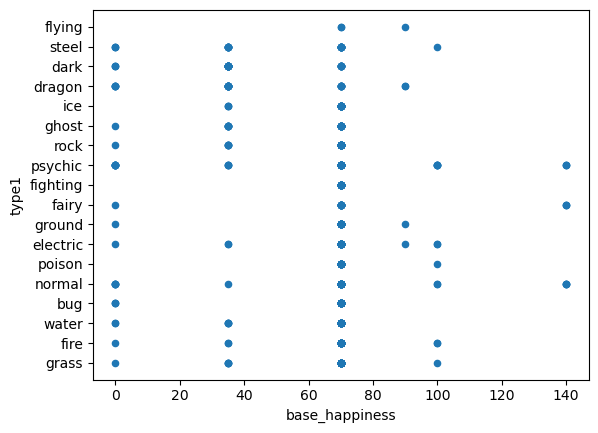

In [8]:
#plotting base happiness vs type
type1_df.plot.scatter(x="base_happiness", y="type1")

happy_df = df[["name", "type1", "type2", "base_happiness"]]
happy_df["base_happiness"] = happy_df["base_happiness"].astype(int)

In [9]:
#researching a correlation for happy pokemon
happy_pokemon = df.loc[df["base_happiness"] >= 100]
happy_pokemon.head()

happy_corr = happy_pokemon.corr()
happy_corr.head()


ValueError: could not convert string to float: "['Cute Charm', 'Magic Guard', 'Friend Guard']"

In [10]:
#researching a correlation for legendary and base egg steps
happy_pokemon[["is_legendary", "base_egg_steps"]].corr()

,is_legendary,base_egg_steps
is_legendary,1.000000,0.855032
base_egg_steps,0.855032,1.000000


In [38]:
#creating a dataframe for types of pokemon and their base stats, ploting various stats
type_df = df[["name","type1","type2", "attack", "sp_attack", "defense", "sp_defense", "hp"]]

type_df.plot(
    kind='scatter',
    x='attack',
    y=['defense', 'sp_attack', 'sp_defense', 'hp'],
    backend='plotly',
    title = 'attack vs base stats'

)

In [39]:
#Including sub types and creating a dragon dataframe
all_type_df = type_df[["name", "type1", "type2", "attack", "defense", "sp_attack", "sp_defense", "hp"]]

dragon_df = all_type_df.loc[type_df["type1"] == 'dragon']
len(dragon_df)

27

In [40]:
#Plotting dragon dataframe to research base stats
dragon_df.plot(
    kind='scatter',
    x='type2',
    y=['attack', 'defense', 'sp_attack', 'sp_defense', 'hp'],
    backend='plotly',
)

<Axes: xlabel='type2'>

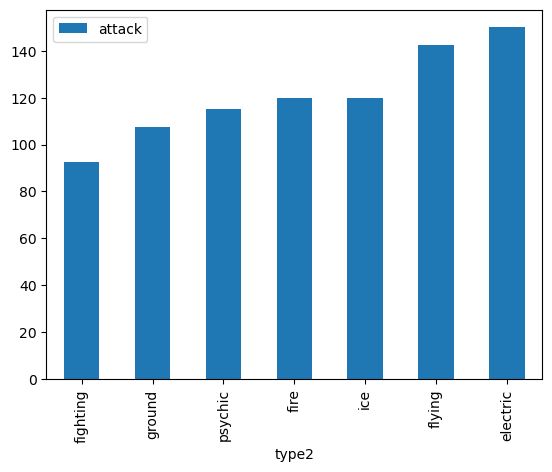

In [41]:
# plotting sub types of dragon pokemon and their attack average
dragon_sorted_df = dragon_df.groupby('type2')[['attack']].mean().sort_values('attack')
dragon_sorted_df.plot(kind='bar')

<Axes: xlabel='type1'>

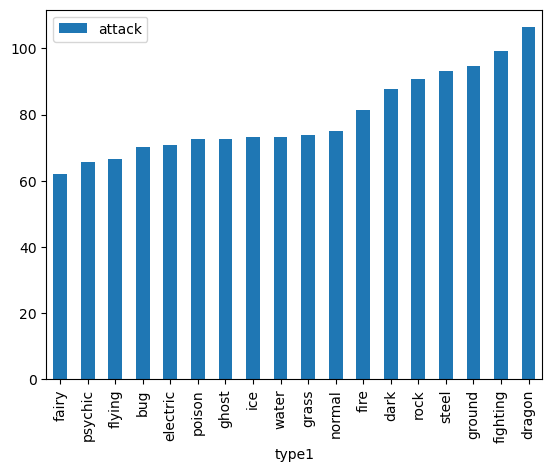

In [42]:
#plotting average dragon attack values
type_attack_df = type_df.groupby('type1')[['attack']].mean().sort_values('attack')
type_attack_df.plot(kind='bar')

In [16]:
#researching correlation between attack and defense values
type_df[["defense", "attack"]].corr()

,defense,attack
defense,1.000000,0.468915
attack,0.468915,1.000000


<Axes: xlabel='type1'>

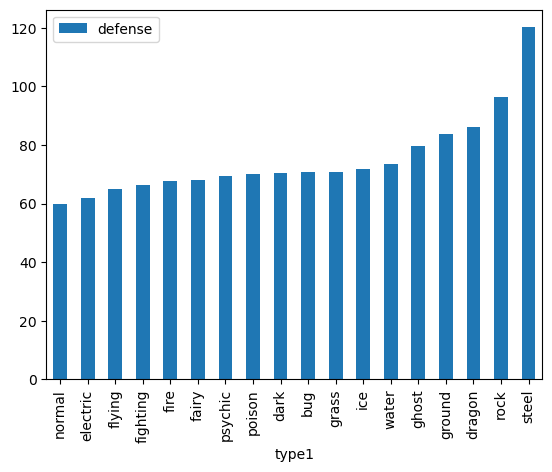

In [17]:
#Plotting average defense values for types
type_defense_df = type_df.groupby('type1')[['defense']].mean().sort_values('defense')
type_defense_df.plot(kind='bar')

<Axes: xlabel='type2'>

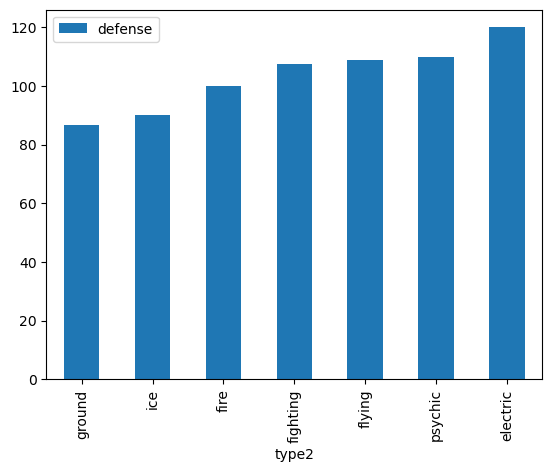

In [18]:
# plotting sub types of dragon pokemon and their attack average
dragon_sorted_df = dragon_df.groupby('type2')[['defense']].mean().sort_values('defense')
dragon_sorted_df.plot(kind='bar')
